## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#Check the number of mice

mice_num = len(study_data_complete["Mouse ID"].unique())

print (mice_num)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


duplicatemice = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID","Timepoint",]), "Mouse ID"].unique()

print(duplicatemice)


['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# set the index to the mouse ID
# check the mouse data for ID


dupMiceData = study_data_complete.loc[study_data_complete["Mouse ID"]=="g989"]

dupMiceData = dupMiceData.set_index("Mouse ID")

dupMiceData


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
dupMiceData.index

Index(['g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989',
       'g989', 'g989', 'g989', 'g989'],
      dtype='object', name='Mouse ID')

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleandata = study_data_complete[study_data_complete["Mouse ID"].isin(["g989"])==False]

cleandata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.

len(cleandata["Mouse ID"].unique())



248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


# series variable to hold Tumor Volume Data grouped by Drug Regimen

# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
means=cleandata.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

# variable to hold median Tumor Volume Data Grouped by Drug Regimen
median=cleandata.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen
variance=cleandata.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen
standev=cleandata.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen
stderror=cleandata.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Convert to DataFrame

tumorsummaryTable = pd.DataFrame({
    
    "Mean Tumor Volume": means,
    "Median Tumor Volume":median,
    "Tumor Volume Variance":variance,
    "Tumor Volume Stdev": standev,
    "Tumor Volume SEM": stderror   
    
})

# Preview DataFrame
tumorsummaryTable

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tumor_summarytable = cleandata.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)":["mean","median","var","std","sem"]
})




tumor_summarytable

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
cleandata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


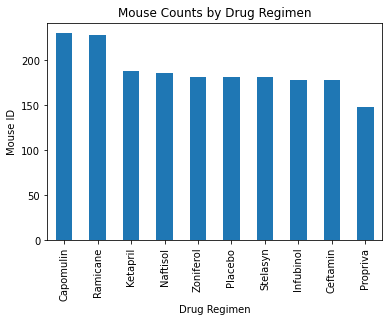

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# list of unique drug regimens

# # drug regimen as x-axis values for plotting

# # drop all duplicate mice

# # get mice counts per drug


counts = cleandata["Drug Regimen"].value_counts()


counts.plot(kind="bar")
plt.ylabel("Mouse ID")

plt.xlabel("Drug Regimen")

plt.title("Mouse Counts by Drug Regimen")

plt.show()


Text(0.5, 1.0, 'Mice Counts by Drug Regimen')

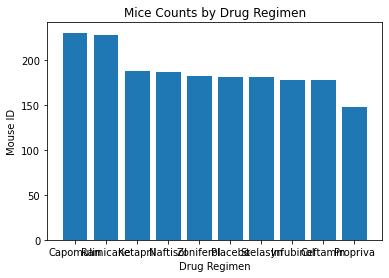

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen


plt.bar(counts.index.values,counts.values)

plt.ylabel("Mouse ID")

plt.xlabel("Drug Regimen")

plt.title("Mice Counts by Drug Regimen")


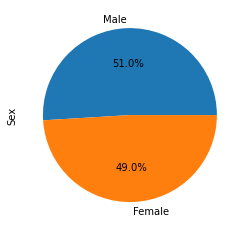

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sexcounts = cleandata["Sex"].value_counts()

sexcounts.plot(kind="pie", autopct="%1.1f%%")

plt.show()

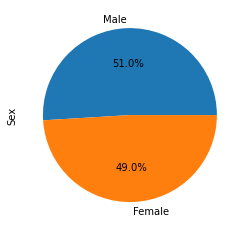

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sexcounts.values,labels=sexcounts.index.values,autopct="%1.1f%%")

plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin



#removing Drug Regimens

newcleandata = cleandata[cleandata["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])==True]
newcleandata


newindex = newcleandata.set_index("Drug Regimen")

newcleandata

# isolated view of just capomulin for later use

Caponly = newcleandata[newcleandata["Drug Regimen"].isin(["Capomulin"])==True]
Caponly

# Reset index so drug regimen column persists after inner merge

Capindex = Caponly.set_index("Drug Regimen")

Capindex




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Capomulin,j246,0,45.000000,0,Female,21,21
Capomulin,r554,0,45.000000,0,Female,8,17
Capomulin,s185,0,45.000000,0,Female,3,17
Capomulin,b742,0,45.000000,0,Male,7,21
...,...,...,...,...,...,...,...
Capomulin,s710,45,40.728578,1,Female,1,23
Capomulin,j119,45,38.125164,1,Female,7,23
Capomulin,i557,45,47.685963,1,Female,1,24


In [15]:
# get mouse count per drug

# Start by getting the last (greatest) timepoint for each mouse

Mouse_Drug = newcleandata.groupby("Mouse ID")["Timepoint"].max()
Mouse_Drug = Mouse_Drug.reset_index()
Mouse_Drug.head()



,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [17]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# show all rows of data



cleanMerge = Mouse_Drug.merge(newcleandata, on = ["Mouse ID", "Timepoint"], how="left")
indexcleanMerge = cleanMerge.set_index("Mouse ID")

cleanMerge.head()





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers


Drug_List = ['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

# Create empty list to fill with tumor vol data (for plotting)
TVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for d in Drug_List:
    finaltumorcount = cleanMerge.loc[cleanMerge["Drug Regimen"]==d,"Tumor Volume (mm3)"]
    TVol.append(finaltumorcount)
    
#Determining Outliers
    quartiles = finaltumorcount.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    median = quartiles[0.50]
    inqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * inqr)
    upperbound = upperq + (1.5 * inqr)
    
    print (d)
    
#     print (quartiles)
    
    print (f'''The lower quartile of Tumor Volume is: {lowerq}    
The upper quartile of Tumor Volume is: {upperq}
The interquartile range of Tumor Volume is:{inqr} 
The the median of Tumor Volume is: {median}
Values below {lowerbound} could be outliers.
Values above {upperbound} could be outliers.
''')
    
    

Infubinol
The lower quartile of Tumor Volume is: 54.04860769    
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is:11.477135160000003 
The the median of Tumor Volume is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin
The lower quartile of Tumor Volume is: 48.72207785    
The upper quartile of Tumor Volume is: 64.29983003
The interquartile range of Tumor Volume is:15.577752179999997 
The the median of Tumor Volume is: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.

Ramicane
The lower quartile of Tumor Volume is: 31.56046955    
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is:9.098536719999998 
The the median of Tumor Volume is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Capomulin
The lower quarti

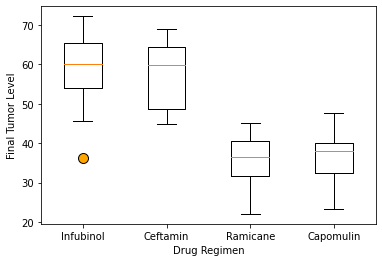

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

orange=dict(markerfacecolor="orange", markersize = 10)
plt.boxplot(TVol, labels = Drug_List, flierprops = orange)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Level")
plt.show()


## Line and Scatter Plots

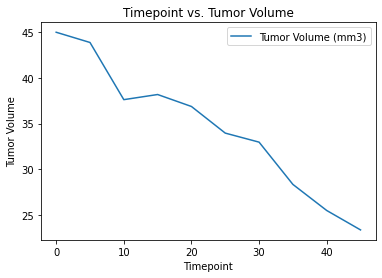

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Caponly

#change index to mouse ID 

Caponly.set_index("Mouse ID")


#remove other mouse IDs so only s185 shows

S185 = Caponly[Caponly["Mouse ID"]=="s185"]

S185

#set the x-axis equal to the Timepoint and y-axis to Tumor Volume
S185.plot(kind ='line', x="Timepoint",y="Tumor Volume (mm3)")

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title ("Timepoint vs. Tumor Volume")
plt.show()


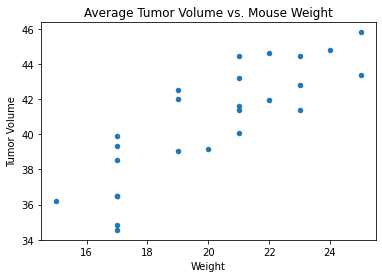

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume

Avg = Caponly.groupby("Mouse ID").mean()

# establish x-axis value for the weight of the mice

Avg.plot(kind ='scatter', x="Weight (g)",y="Tumor Volume (mm3)")

plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title ("Average Tumor Volume vs. Mouse Weight")
plt.show()


# produce scatter plot of the data

## Correlation and Regression

The correlation between Mouse Weight and Tumor Volume is 0.840000


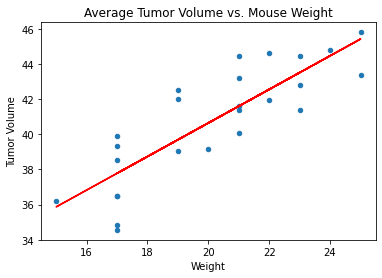

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen




#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg
correlation = round(st.pearsonr(Avg["Weight (g)"],Avg["Tumor Volume (mm3)"])[0],2)

#print St. Pearson Correlation Coefficient

print(f"The correlation between Mouse Weight and Tumor Volume is {correlation:2f}")

# establish linear regression values

model = st.linregress(Avg["Weight (g)"],Avg["Tumor Volume (mm3)"])


# Create linear regression line 

# slope is y=mx+b

yValues = Avg["Weight (g)"]*model[0] + model[1]


# scatter plot of the data

Avg.plot(kind ='scatter', x="Weight (g)",y="Tumor Volume (mm3)")

plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title ("Average Tumor Volume vs. Mouse Weight")

#Plot linear regression line


plt.plot(Avg["Weight (g)"], yValues, color ="red"  )
plt.show()


